尽管名为逻辑回归，但实际上是一个分类模型，尤其是在我们只有两个类时。逻辑回归的名称来源于将输入的任意实值x转换成值在0到1之间的一个预测输出值ŷ的逻辑函数（或者Sigmoid函数），四舍五入到最近的整数，有效地将输入分类为0或者1。

鸢尾花数据集一共提供4个特征。为了简单起见，我们将重点关注前两个特征：花萼长度——我们将其称为特征f1，花萼的宽度——我们将其称为特征f2。


In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

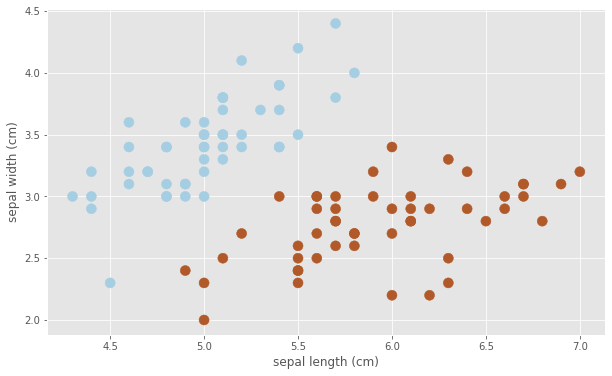

In [3]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [4]:
# 将数据拆分成训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.1, random_state=42
)

# 训练分类器

In [5]:
lr = cv2.ml.LogisticRegression_create()
# 每个数据点之后都更新模型
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)
# 指定算法在终止前应该运行的迭代次数
lr.setIterations(100)
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train);
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

# 测试分类器

In [6]:
# 计算一下训练集的准确率得分
ret, y_pred = lr.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [7]:
# 检查测试数据集
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0